# **Cricket Analysis**

## **CONTEXT**

***Player's performance,team's performance are some match turning features which can't be easily seen by game of that player's or team's currunt condition, We have to check their previous records and took out some analysis on the basis of which we plan our Team's play.***

***Our project will be making a model for analysis of batsman's performance of various team in ODI matches.***

## **OBJECTIVE**

***This article's major aim is to estimate the best teams and player among thousands of players in light of a diverse range of factors. The data utilized in this piece is either accessible at Kaggle. We will be performing various analysis techniques to get to our goal which includes of graphs, maps,etc.***


## **DATA DESCRIPTION**

***Our data set consist of records of batsman of ODI matches. We have players of over 24 region of world.***

## **INFO ABOUT DATA**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/ODI data.csv')
data.shape

(2500, 15)

In [ ]:
data.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN
5,5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,NaN
6,6,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,NaN
7,7,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,NaN
8,8,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,NaN
9,9,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2500 non-null   int64  
 1   Player       2500 non-null   object 
 2   Span         2500 non-null   object 
 3   Mat          2500 non-null   int64  
 4   Inns         2500 non-null   object 
 5   NO           2500 non-null   object 
 6   Runs         2500 non-null   object 
 7   HS           2500 non-null   object 
 8   Ave          2500 non-null   object 
 9   BF           2500 non-null   object 
 10  SR           2500 non-null   object 
 11  100          2500 non-null   object 
 12  50           2500 non-null   object 
 13  0            2500 non-null   object 
 14  Unnamed: 13  0 non-null      float64
dtypes: float64(1), int64(2), object(12)
memory usage: 293.1+ KB


In [ ]:
data.describe()

,Unnamed: 0,Mat,Unnamed: 13
count,2500.000000,2500.000000,0.0
mean,24.500000,37.161600,NaN
std,14.433757,58.885075,NaN
min,0.000000,1.000000,NaN
25%,12.000000,4.000000,NaN
50%,24.500000,13.000000,NaN
75%,37.000000,43.000000,NaN
max,49.000000,463.000000,NaN


In [ ]:
data.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', 'Unnamed: 13'],
      dtype='object')

## **DATA PREPROCESSING**

In [ ]:
[col for col in data.columns if data[col].isnull().sum() > 0]

['Unnamed: 13']

In [ ]:
unique_cols =  [x for x in data.columns if data[x].nunique()==1]
print(unique_cols)
data.drop(unique_cols,axis=1,inplace=True)
data.columns

[]


Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', 'Unnamed: 13'],
      dtype='object')

(About column Unnamed:0 and 13)

In [ ]:
data.drop('Unnamed: 13',axis=1,inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [ ]:
data.shape

(2500, 13)

(IN REGION MANY ROWS HAVE 3 VALUES BUT ONLY ONE IS THERE TEAM NAME ELSE IS REGION AND ICC, HAVE ELIMINATE OTHER NAMES OTHERTHEN TEAM NAME WHICH IS IN CAPITAL)

In [ ]:
data[['Player', 'Region']] = data['Player'].str.split('(', n=1, expand=True)
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,INDIA)
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,Asia/ICC/SL)
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS/ICC)
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,Asia/SL)
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,Asia/SL)


In [ ]:
data['Region'] = data['Region'].map(lambda x: x.rstrip(')'))
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,Asia/ICC/SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS/ICC
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,Asia/SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,Asia/SL


In [ ]:
data[['Start Year', 'Last Year']] =data['Span'].str.split('-', n=1, expand=True)
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start Year,Last Year
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,INDIA,1989,2012
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,Asia/ICC/SL,2000,2015
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS/ICC,1995,2012
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,Asia/SL,1989,2011
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,Asia/SL,1998,2015


In [ ]:
data[['Region1', 'Region']] = data['Region'].str.split('/', n=1, expand=True)
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start Year,Last Year,Region1
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,None,1989,2012,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,ICC/SL,2000,2015,Asia
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,ICC,1995,2012,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,SL,1989,2011,Asia
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,SL,1998,2015,Asia


In [ ]:
data[['Region2', 'Region']] = data['Region'].str.split('/', n=1, expand=True)
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start Year,Last Year,Region1,Region2
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,None,1989,2012,INDIA,None
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,SL,2000,2015,Asia,ICC
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,None,1995,2012,AUS,ICC
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,None,1989,2011,Asia,SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,None,1998,2015,Asia,SL


In [ ]:
def new_co(data):
    if data['Region1'] is not None:
        if data['Region1'].isupper():
            if (data.Region1=='ICC'):
                return data['Region2']
            else:
                return data['Region1']
                
        elif data['Region'] is not None:
            if data['Region'].isupper():
                if data['Region'] is not "ICC":
                    return data['Region']
            else:
                return data['Region2']
        else:
                return data['Region2']
    else:
        return "NA"


In [ ]:
data[data['Region1'].str.contains('ICC')]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start Year,Last Year,Region1,Region2
11,CH Gayle,1999-2019,301,294,17,10480,215,37.83,12019,87.19,25,54,25,None,1999,2019,ICC,WI
12,BC Lara,1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,None,1990,2007,ICC,WI
31,SP Fleming,1994-2007,280,269,21,8037,134*,32.4,11242,71.49,8,49,17,None,1994,2007,ICC,NZ
89,CL Cairns,1991-2006,215,193,25,4950,115,29.46,5874,84.26,4,26,9,None,1991,2006,ICC,NZ
205,DL Vettori,1997-2015,295,187,57,2253,83,17.33,2715,82.98,0,4,23,None,1997,2015,ICC,NZ
951,M Ntini,1998-2009,173,47,24,199,42*,8.65,298,66.77,0,0,9,None,1998,2009,ICC,SA


In [ ]:
data['Final Region'] = data.apply(new_co, axis=1)
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start Year,Last Year,Region1,Region2,Final Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,None,1989,2012,INDIA,None,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,SL,2000,2015,Asia,ICC,SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,None,1995,2012,AUS,ICC,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,None,1989,2011,Asia,SL,SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,None,1998,2015,Asia,SL,SL


In [ ]:
print(data['Final Region'].unique())

['INDIA' 'SL' 'AUS' 'PAK' 'SA' 'WI' 'NZ' 'ENG' 'BDESH' 'ZIM' 'IRE' 'KENYA'
 'AFG' 'SCOT' 'CAN' 'NL' 'UAE' 'HKG' 'BMUDA' 'PNG' 'USA' 'NAM' 'NEPAL'
 'OMAN' '3) (PAK' None '1) (UAE']


In [ ]:
data[data['Final Region'].isna()]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start Year,Last Year,Region1,Region2,Final Region
1497,Frasat Ali,1975-1975,3,3,0,57,45,19,176,32.38,0,0,1,None,1975,1975,EAf,None,None
1524,RK Sethi,1975-1975,3,3,0,54,30,18,185,29.18,0,0,0,None,1975,1975,EAf,None,None
1591,Jawahir Shah,1975-1975,3,3,0,46,37,15.33,114,40.35,0,0,0,None,1975,1975,EAf,None,None
1633,Mehmood Quaraishy,1975-1975,3,3,1,41,19,20.5,154,26.62,0,0,0,None,1975,1975,EAf,None,None
1664,Zulfiqar Ali,1975-1975,3,3,1,39,30,19.5,76,51.31,0,0,0,None,1975,1975,EAf,None,None
1676,S Walusimbi,1975-1975,3,3,0,38,16,12.66,126,30.15,0,0,0,None,1975,1975,EAf,None,None
2053,PS Mehta,1975-1975,1,1,0,12,12,12,41,29.26,0,0,0,None,1975,1975,EAf,None,None
2136,PG Nana,1975-1975,3,3,2,9,8*,9,45,20,0,0,1,None,1975,1975,EAf,None,None
2222,Harilal Shah,1975-1975,3,3,0,6,6,2,56,10.71,0,0,2,None,1975,1975,EAf,None,None
2242,H McLeod,1975-1975,2,2,0,5,5,2.5,10,50,0,0,1,None,1975,1975,EAf,None,None


(BEFORE)

In [ ]:
data.isna().sum()

Player             0
Span               0
Mat                0
Inns               0
NO                 0
Runs               0
HS                 0
Ave                0
BF                 0
SR                 0
100                0
50                 0
0                  0
Region          2492
Start Year         0
Last Year          0
Region1            0
Region2         2423
Final Region      13
dtype: int64

In [ ]:
data=data[data['Final Region'].isnull()==False]


In [ ]:
data=data.drop('Region',axis=1)
data=data.drop('Region1',axis=1)
data=data.drop('Region2',axis=1)

In [ ]:
data.head(20)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,Last Year,Final Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,1989,2011,SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,SL
5,Inzamam-ul-Haq,1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,1991,2007,PAK
6,V Kohli,2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,2008,2019,INDIA
7,JH Kallis,1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,1996,2014,SA
8,SC Ganguly,1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,1992,2007,INDIA
9,R Dravid,1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1996,2011,INDIA


(AFTER)

In [ ]:
data.isna().sum()

Player          0
Span            0
Mat             0
Inns            0
NO              0
Runs            0
HS              0
Ave             0
BF              0
SR              0
100             0
50              0
0               0
Start Year      0
Last Year       0
Final Region    0
dtype: int64

In [ ]:
data[data['Final Region'].str.contains('1')]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,Last Year,Final Region
2148,Asif Iqbal,2015-2015,1,1,0,8,8,8,8,100,0,0,0,2015,2015,1) (UAE


In [ ]:
data[data['Final Region'].str.contains('3')]


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,Last Year,Final Region
949,Mohammad Nawaz,2016-2019,15,12,3,199,53,22.11,213,93.42,0,1,0,2016,2019,3) (PAK


In [ ]:
data=data.drop(949)
data=data.drop(2148)

In [ ]:
print(data['Final Region'].unique())

['INDIA' 'SL' 'AUS' 'PAK' 'SA' 'WI' 'NZ' 'ENG' 'BDESH' 'ZIM' 'IRE' 'KENYA'
 'AFG' 'SCOT' 'CAN' 'NL' 'UAE' 'HKG' 'BMUDA' 'PNG' 'USA' 'NAM' 'NEPAL'
 'OMAN']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        2485 non-null   object
 1   Span          2485 non-null   object
 2   Mat           2485 non-null   int64 
 3   Inns          2485 non-null   object
 4   NO            2485 non-null   object
 5   Runs          2485 non-null   object
 6   HS            2485 non-null   object
 7   Ave           2485 non-null   object
 8   BF            2485 non-null   object
 9   SR            2485 non-null   object
 10  100           2485 non-null   object
 11  50            2485 non-null   object
 12  0             2485 non-null   object
 13  Start Year    2485 non-null   object
 14  Last Year     2485 non-null   object
 15  Final Region  2485 non-null   object
dtypes: int64(1), object(15)
memory usage: 330.0+ KB


In [ ]:
data['Start Year']=data['Start Year'].astype('int')
data['Last Year']=data['Last Year'].astype('int')

In [ ]:
data['Duration']=data['Last Year']-data['Start Year']
data

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,Last Year,Final Region,Duration
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,INDIA,23
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,SL,15
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,AUS,17
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,1989,2011,SL,22
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,SL,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,ZS Ansari,2015-2015,1,-,-,-,-,-,-,-,-,-,-,2015,2015,ENG,0
2496,Ariful Haque,2018-2018,1,-,-,-,-,-,-,-,-,-,-,2018,2018,BDESH,0
2497,Ashfaq Ahmed,1994-1994,3,-,-,-,-,-,-,-,-,-,-,1994,1994,PAK,0
2498,MD Bailey,1998-1998,1,-,-,-,-,-,-,-,-,-,-,1998,1998,NZ,0


In [ ]:
data['Runs']=data['Runs'].str.replace('-','0')
data['HS']=data['HS'].str.replace('*','')
data['Ave']=data['Ave'].str.replace('-','0')
data['SR']=data['SR'].str.replace('-','0')
data['Inns']=data['Inns'].str.replace('-','0')
data['NO']=data['NO'].str.replace('-','0')
data['HS']=data['HS'].str.replace('-','0')
data['BF']=data['BF'].str.replace('-','0')
data['100']=data['100'].str.replace('-','0')
data['50']=data['50'].str.replace('-','0')
data['0']=data['0'].str.replace('-','0')

In [ ]:
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,Last Year,Final Region,Duration
0,SR Tendulkar,1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012,INDIA,23
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,SL,15
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,AUS,17
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,1989,2011,SL,22
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,SL,17


In [ ]:
data['Runs']=data['Runs'].astype('float')
data['Ave']=data['Ave'].astype('float')
data['HS']=data['HS'].astype('float')
data['SR']=data['SR'].astype('float')

## **QUE 1. Histogram of Highest Score of players**

---



(array([186., 128., 106., 125., 121.,  70., 111.,  93.,  51.,  66.,  75.,
         57.,  73.,  34.,  63.,  45.,  34.,  61.,  50.,  40.,  51.,  46.,
         35.,  45.,  15.,  34.,  38.,  23.,  24.,  32.,  15.,  35.,  22.,
         21.,  16.,  21.,  19.,  21.,  33.,  26.,  21.,  13.,  28.,  24.,
         14.,  22.,  24.,   6.,  13.,  15.,  14.,  12.,  11.,  13.,  15.,
          3.,   8.,   8.,   1.,   6.,   7.,   0.,   3.,   1.,   8.,   5.,
          5.,   5.,   3.,   3.,   2.,   3.,   0.,   2.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   2.64,   5.28,   7.92,  10.56,  13.2 ,  15.84,  18.48,
         21.12,  23.76,  26.4 ,  29.04,  31.68,  34.32,  36.96,  39.6 ,
         42.24,  44.88,  47.52,  50.16,  52.8 ,  55.44,  58.08,  60.72,
         63.36,  66.  ,  68.64,  71.28,  73.92,  76.56,  79.2 ,  81.84,
         84.48,  87.12,  89.76

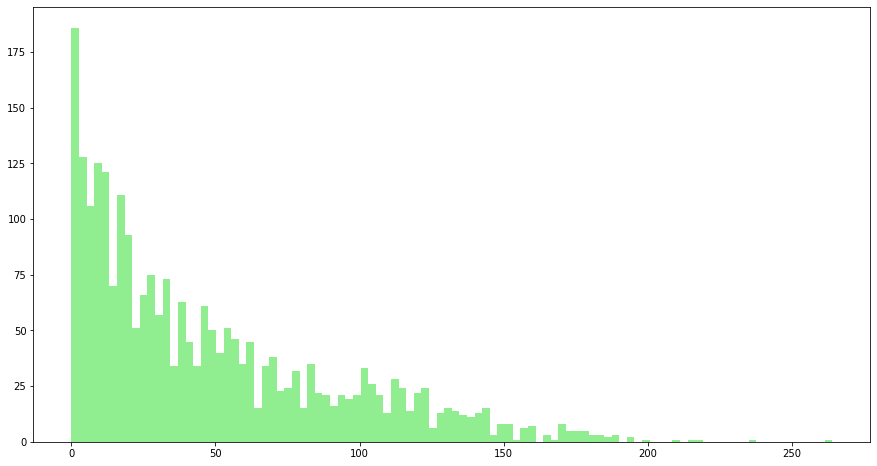

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(data['HS'],bins=100,color = "lightgreen")

***Highest Score is 186 and Many Players have high score as zero(0).***

## **QUE 2. Scatter plot of runs with respect to Final Region.**

---



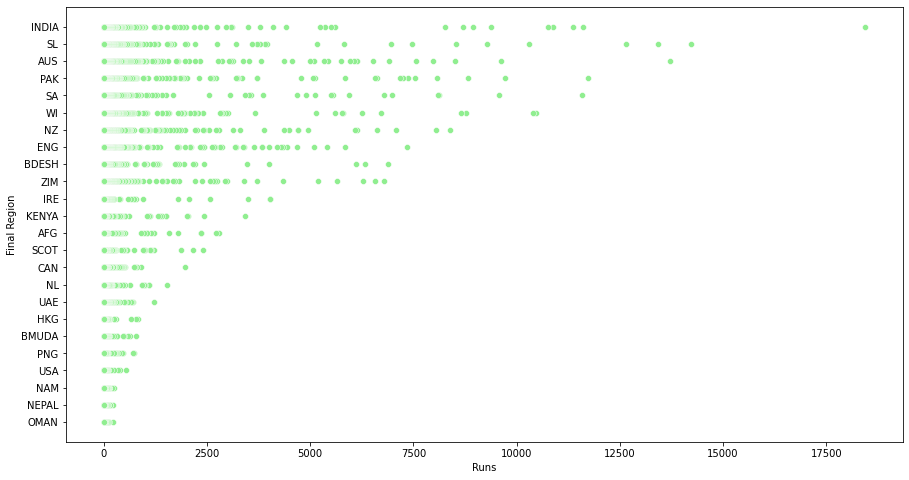

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='Runs',y='Final Region',color = "lightgreen")

***Indian player have vast range of run scored (0, less than 12500) but 1 player has scored very high run than all other player. ManyEngland player have scored runs <7500.*** 








## **QUE 3. Distplot for average run scored vs density distribution**

---



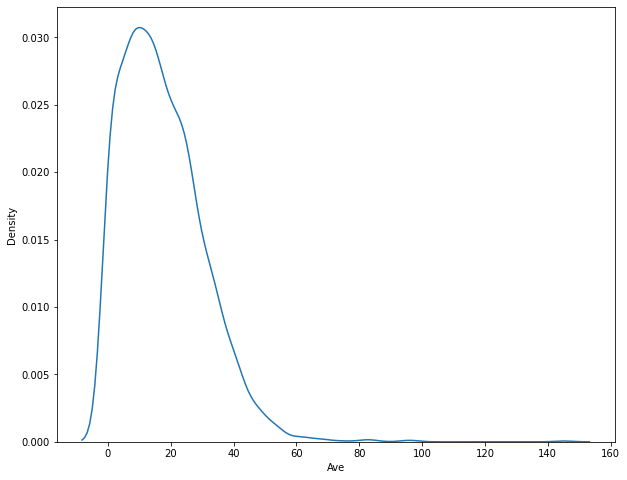

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Ave'],hist=False)

***Very less player have average run in the range(60,155).High density of player are at 10-20 runs of average.*** 





## **QUE 4. Bar graph between Final Region and Total runs of that region.**

---



<BarContainer object of 24 artists>

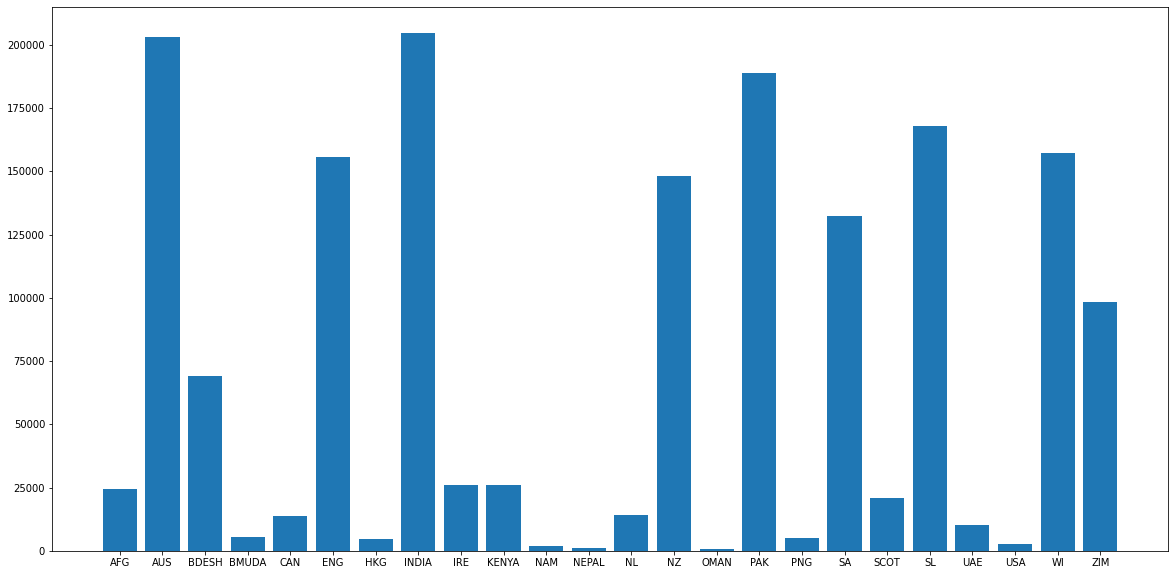

In [ ]:
plt.figure(figsize=(20,10))
x=data.groupby('Final Region').sum()
plt.bar(sorted(data['Final Region'].unique()),x.Runs)

***Australia and India have Highest runs scored among all region. Namibia,Oman and Nepal have least runs in all.***

## **Que 5. Line chart for duration to check most experiencd team.**





---



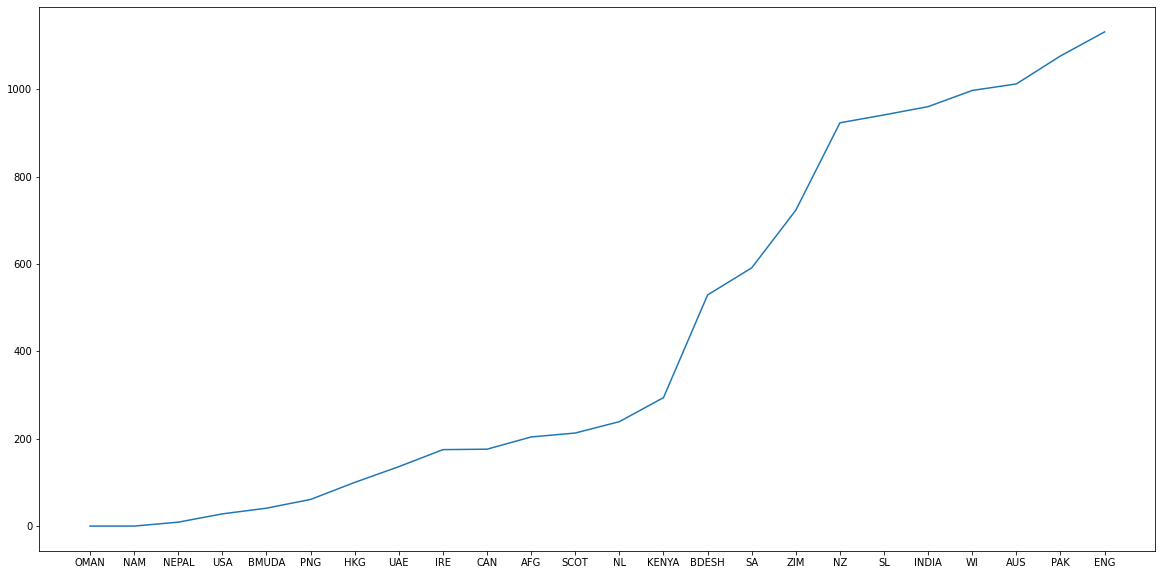

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data.groupby('Final Region').agg({'Duration' : 'sum'}).sort_values('Duration'))

***Nation on right side of chart are more experienced the the newbies on the left side***

## **Que 6. Analyse Nation with respect to matches played.**

---



In [ ]:
data.groupby('Final Region').sum().sort_values('Mat',ascending=False)

,Mat,Runs,HS,Ave,SR,Start Year,Last Year,Duration
Final Region,,,,,,,,
INDIA,10813,204716.0,10747.0,3684.30,14512.80,433229,434189,960
AUS,10506,203341.0,11855.0,4344.06,15070.74,436680,437692,1012
PAK,10210,189075.0,10795.0,4163.64,13996.44,437179,438255,1076
SL,9379,168064.0,8548.0,2987.25,11671.70,369649,370590,941
WI,8883,157119.0,10350.0,3496.91,12322.25,379596,380593,997
NZ,8385,148263.0,9774.0,3339.99,12350.53,377050,377973,923
ENG,8344,155527.0,12530.0,4721.02,16081.68,492392,493523,1131
SA,6796,132411.0,7122.0,2502.00,8888.95,244326,244917,591
ZIM,5795,98493.0,7163.0,2125.18,8198.59,272152,272875,723


***Nation wise summed data and sorted with respect to matches played.***

## **Que 7. Top 10 batsman.(runs/matches)**

---



In [ ]:
df=pd.DataFrame().assign(player=data['Player'],contry=data['Final Region'],rpm=data['Runs']/data['Mat'])
df.sort_values(by='rpm',ascending=False).head(10)

,player,contry,rpm
1326,KJ Barnett,ENG,84.0
1033,T Bavuma,SA,80.5
1082,MP O'Dowd,NL,72.5
865,CT Radley,ENG,62.5
1466,BT Foakes,ENG,61.0
1166,CRM Douglas,BMUDA,61.0
1186,GK Khoda,INDIA,57.5
1508,FY Fazal,INDIA,55.0
1023,MJ Lumb,ENG,55.0
1535,AJ Woodcock,AUS,53.0


## **Que 8.Top 5 batsman with highest strike rate.**

---



In [ ]:
df=pd.DataFrame().assign(player=data['Player'],contry=data['Final Region'],sr=data['SR'])
df.sort_values(by='sr',ascending=False).head()

,player,contry,sr
1860,J Louw,SA,328.57
2037,HN Ya France,NAM,260.00
2178,NP Kenjige,USA,233.33
1858,Hasti Gul,AFG,209.09
2262,Fawad Ahmed,AUS,200.00


## **Que 9. list of top 10 player with respect to average.**

---



In [ ]:
df=pd.DataFrame().assign(player=data['Player'],contry=data['Final Region'],av=data['Ave'])
df.sort_values(by='av',ascending=False).head(10)

,player,contry,av
1082,MP O'Dowd,NL,145.00
1268,AL Kandappah,CAN,97.00
1274,Aamer Yamin,PAK,95.00
1326,KJ Barnett,ENG,84.00
865,CT Radley,ENG,83.33
1033,T Bavuma,SA,80.50
513,HE van der Dussen,SA,73.77
1110,RJ Bailey,ENG,68.50
1119,SRD Wettimuny,SL,68.00
285,RN ten Doeschate,NL,67.00


## **Que 10. bar chart of century and half century with respect to final region.**

---



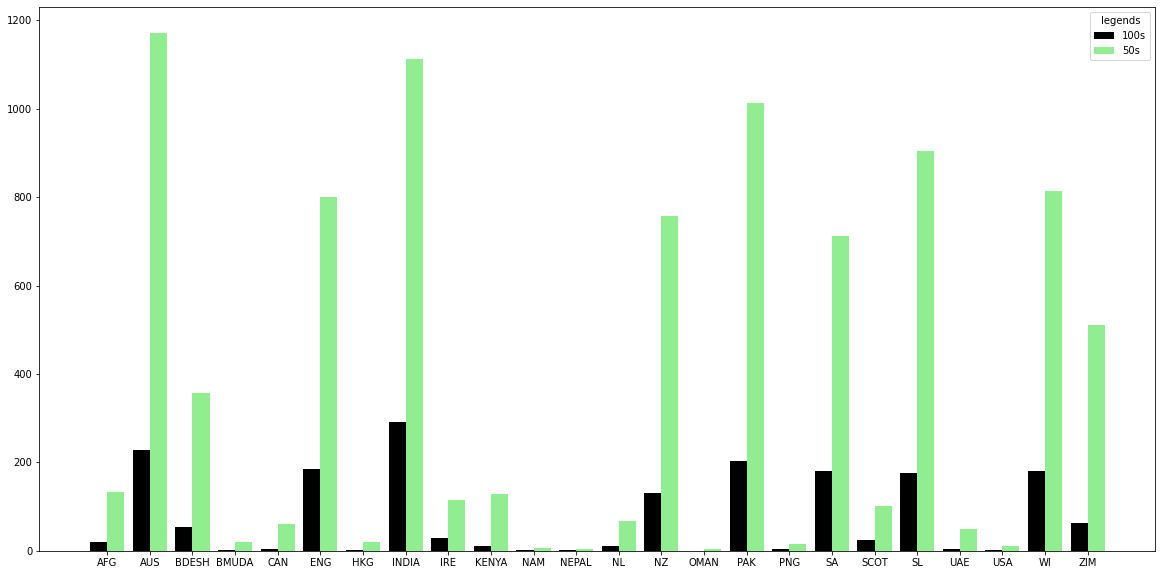

In [ ]:
plt.figure(figsize=(20,10))
data['100']=data['100'].astype('int')
data['50']=data['50'].astype('int')
df=pd.DataFrame().assign(contry=data['Final Region'],century=data['100'],fifty=data['50'])
lst=list(df['contry'].unique())
X_axis=np.arange(len(lst))
plt.bar(X_axis-0.2,df.groupby('contry')['century'].sum(),width=0.4,color='black')
plt.bar(X_axis+0.2,df.groupby('contry')['fifty'].sum(),width=0.4,color='lightgreen')
plt.xticks(X_axis,sorted(lst))
leg=['100s','50s']
plt.legend(leg, title='legends')
           

plt.show()



***Teams have scored fifties more than centuries.***

***Australia have highest fifties scored but India have most centuries scored.***

## **Que 11.list of players that have strik rate greater than 150.**


---





In [ ]:
lst=data.index[data['SR']>150].tolist()
row=data.iloc[lst]
row['Player']

1669              PJ Martin 
1789       HAPW Jayawardene 
1865           Waheed Ahmed 
1867           UNK Fernando 
2008         Mohammad Akram 
2044            RP de Groen 
2085              FJ Titmus 
2114               KK Ahmed 
2115             MJ Bennett 
2119            SJ Chalmers 
2188    Izatullah Dawlatzai 
2275              PI Pocock 
Name: Player, dtype: object

## **Que 12. Heat map to analyse batsmans capacity to be on pitch (nation wise).**

---





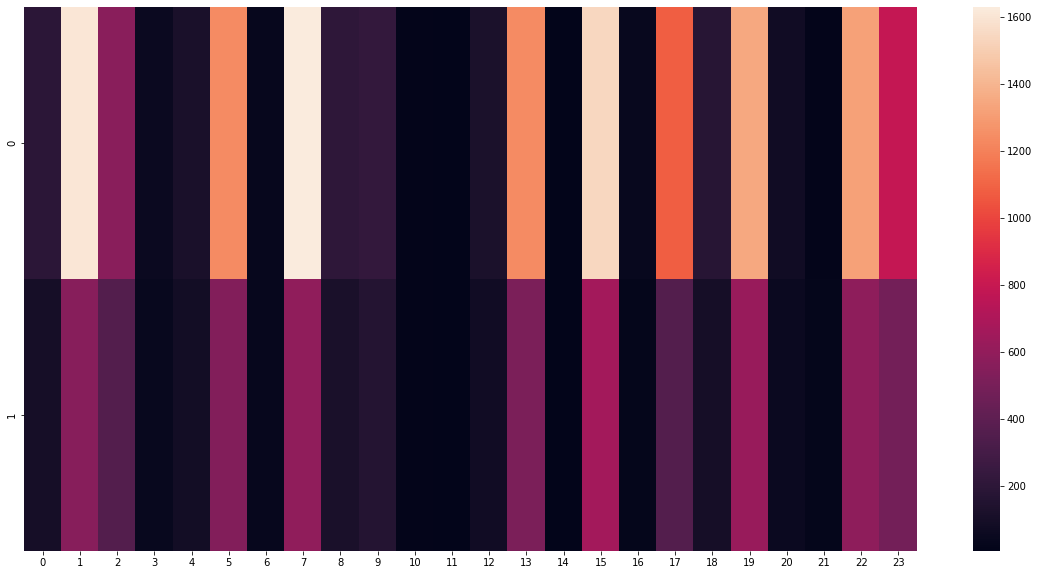

In [ ]:
plt.figure(figsize=(20,10))
data['NO']=data['NO'].astype('int')
data['0']=data['0'].astype('int')
df=pd.DataFrame().assign(reg=data['Final Region'],notout=data['NO'],out=data['0'])
x1=list(df.groupby('reg')['notout'].sum())
x2=list(df.groupby('reg')['out'].sum())
sns.heatmap(data=[x1,x2])

## **Que 13. Print the name of the players who have played less than 100 innings but have more than 100 Strike rate.** 

---



In [ ]:
data['Inns']=data['Inns'].astype('int')

lst1=data.index[data['Inns']<100].tolist()
lst2=data.index[data['SR']>100].tolist()
list3 = set(lst1).intersection(lst2)
l=list(list3)
row1=data.iloc[l]
print(row1['Player'])

515         LE Plunkett 
1542        Zahoor Khan 
2062         Abul Hasan 
1546           A Mithun 
2065      Arshad Pervez 
              ...       
485            N Pooran 
2028           RL Hayes 
2041    GK Bruk-Jackson 
1013          CP Rizwan 
2044        RP de Groen 
Name: Player, Length: 135, dtype: object


***Only 135 players are there who has played less innings but have maintained a good strike rate.***

## **Que 14. List of top 10 players who has played less than 100 innings and have total runs greater than 2000**.


---



In [ ]:
data['Inns']=data['Inns'].astype('int')

l1=data.index[data['Inns']<100].tolist()
l2=data.index[data['Runs']>2000].tolist()
l3 = set(l1).intersection(l2)
lt=list(l3)
row1=data.iloc[lt]
row1['Player'].head(10)

134    HH Dippenaar 
137          JJ Roy 
139      Babar Azam 
143         AN Cook 
153       GJ Bailey 
154         SD Hope 
157       AM Rahane 
161     JM Bairstow 
163       IJL Trott 
165        AH Jones 
Name: Player, dtype: object

## **Que 15.Finding the batsman who got most of the golden duck.**

---



In [ ]:
df=pd.DataFrame().assign(name=data['Player'],zeros=data['0'])
a=df['zeros'].max()
idx=df[df['zeros']==a].index.values
print(df['name'][idx])
print(df['zeros'][idx])


3    ST Jayasuriya 
Name: name, dtype: object
3    34
Name: zeros, dtype: int64


## **16. Find the name of players who have less duration but have good total score.**

---



In [ ]:
li1=data.index[data['Duration']<10].tolist()
li2=data.index[data['Runs']>5000].tolist()

li3 = set(li1).intersection(li2)
lit=list(li3)

row1=data.iloc[lit]
row1['Player']


72        WJ Cronje 
73         S Dhawan 
74     F du Plessis 
75       MEK Hussey 
77         A Jadeja 
57    KS Williamson 
63          JE Root 
Name: Player, dtype: object

## **Que 17. list of players who have played long Innings.(TOP 10)**

---



In [ ]:
data['Inns']=data['Inns'].astype('int')
data['BF']=data['BF'].astype('int')

df=pd.DataFrame().assign(reg=data['Final Region'],player=data['Player'],bf_in=data['BF']/data['Inns'])
df.sort_values(by='bf_in',ascending=False).head(10)

,reg,player,bf_in
1326,ENG,KJ Barnett,146.00
1660,UAE,Ramveer Rai,124.00
1580,SL,MG Vandort,117.00
1166,BMUDA,CRM Douglas,109.00
1622,BDESH,Anwar Hossain,107.00
1256,ENG,BC Rose,105.00
1082,NL,MP O'Dowd,100.00
1315,WI,EH Mattis,95.00
1186,INDIA,GK Khoda,92.50
865,ENG,CT Radley,91.75


## **Que 18. Runs per player for every team.**

---



In [ ]:
df=pd.DataFrame().assign(region=data['Final Region'],run=data['Runs'],player=data['Player'])
x1=df.groupby('region')['run'].sum()
x2=df.groupby('region')['player'].count()

x3=(x1//x2)
x3.sort_values(ascending=False)

region
SA       1085.0
INDIA     943.0
AUS       928.0
SL        908.0
PAK       863.0
WI        826.0
NZ        784.0
ZIM       724.0
ENG       629.0
AFG       557.0
KENYA     534.0
BDESH     534.0
IRE       485.0
SCOT      308.0
NL        215.0
PNG       213.0
CAN       161.0
BMUDA     160.0
UAE       127.0
HKG       116.0
USA        85.0
NAM        70.0
OMAN       59.0
NEPAL      56.0
dtype: float64

In [ ]:
df=pd.DataFrame().assign(region=data['Final Region'],run=data['Runs'],player=data['Player'])
# x1=df.groupby('region')['run'].sum()
x2=df.groupby('region')['player'].count()
x2.sort_values(ascending=False)

region
ENG      247
PAK      219
AUS      219
INDIA    217
WI       190
NZ       189
SL       185
ZIM      136
BDESH    129
SA       122
CAN       84
UAE       81
SCOT      68
NL        65
IRE       54
KENYA     49
AFG       44
HKG       41
BMUDA     35
USA       30
NAM       26
PNG       23
NEPAL     19
OMAN      13
Name: player, dtype: int64

# **Conclusion**
*From the overall analysis, it is proved that India has scored second highest runs among all contries and in India Sachin Tendulkar is best player among all players.India'n Team has highest number of century and Australia team has highest number of half century.England team has highest number of players and India is at 4th position.One of the england player KJ Barnett has played longest inning.KJ Barnett is player who has good strike rate and is highest in long plays so this batsman is strong point of england and marked enemy of other teams.*